#Comparação de ensembles
Para esta comparação entre ensembles foi escolhido o Wine Quality Dataset, pois é um dataset interessante tanto para classificação quanto regressão, pois o seu target (quality) é pode ser considerado tanto um valor categorico quanto contínuo.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.metrics import accuracy_score

In [3]:
winequality_red_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
winequality_white_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

In [4]:
red_wine_df = pd.read_csv(winequality_red_url, delimiter=';')

In [5]:
red_wine_df = red_wine_df.sort_values(by=['quality'])
red_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
832,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
899,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
495,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1403,7.2,0.330,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
1090,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8
1449,7.2,0.380,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8


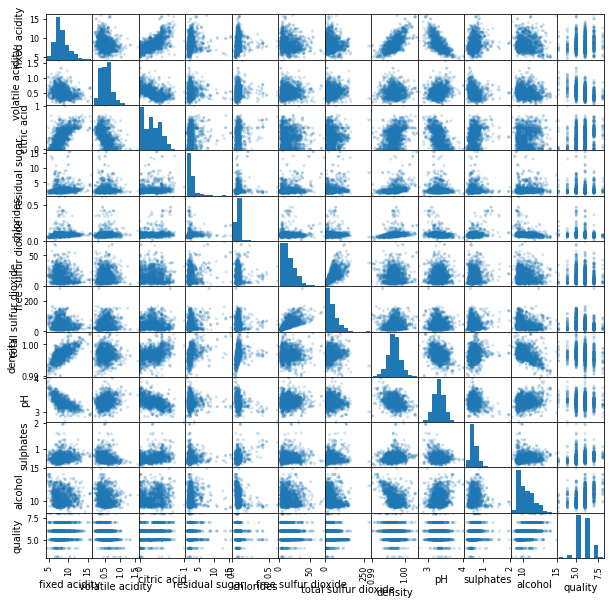

In [6]:
_ = pd.plotting.scatter_matrix(red_wine_df, alpha=0.2, figsize=(10,10))

In [7]:
target_red_wine_df = red_wine_df.pop('quality')
X = red_wine_df.values
y = target_red_wine_df.values

# Train, Validation e Test
Foi utilizado a seguinte divisão nos dados de treino, validação e teste:
* 20% da amostra para Teste
* 20% da amostra para Validação
* 60% da amostra para Treino

In [8]:
from sklearn.model_selection import train_test_split

def train_validation_test_split(X, y, test_size=0.2, validation_size=0.25, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size, random_state=random_state, stratify=y_train)
    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [9]:
X_train, X_validation, X_test, y_train, y_validation, y_test = train_validation_test_split(X, y, test_size=0.2, validation_size=0.25, random_state=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Seleção dos algoritmos
Para seleção dos algorítmos foram testados os seguintes modelos:
* KNeighborsClassifier
* GaussianNB
* Perceptron
* LogisticRegression
* DecisionTreeClassifier
* SVC
* SGDClassifier

Após rodar estes modelos, foram comparados os hits entre eles e selecionado a melhor combinação de modelos de cenários.

Foram testadas cobinações de 3, 4 e 5 modelos, e selecionado as melhores combinações de 3 e 4 modelos. 
* A melhor com 4 modelos: KNN + SVC + SGD Classifier + Logistic Regression
* A melhor com 3 modelos: SVC + SGD Classifier + Logistic Regression

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_validation)
#knnhits = knn_pr == y_test
#knnhits, sum(knnhits)/len(knnhits)
print("Accuracy Score KNN:", accuracy_score(y_validation, knn_pred))

Accuracy Score KNN: 0.428125


In [11]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_pred = gnb_model.predict(X_validation)
print("Accuracy Score GNB:", accuracy_score(y_validation, gnb_pred))

Accuracy Score GNB: 0.55


In [12]:
from sklearn.linear_model import Perceptron
per_model = Perceptron()
per_model.fit(X_train, y_train)
per_pred = per_model.predict(X_validation)
print("Accuracy Score Perceptron:", accuracy_score(y_validation, per_pred))

Accuracy Score Perceptron: 0.503125


In [13]:
from sklearn.linear_model import LogisticRegression
lrc_model = LogisticRegression(max_iter=10000)
lrc_model.fit(X_train, y_train)
lrc_pred = lrc_model.predict(X_validation)
print("Accuracy Score Logistic Regression:", accuracy_score(y_validation, lrc_pred))

Accuracy Score Logistic Regression: 0.59375


In [14]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train, y_train)
dtc_pred = dtc_model.predict(X_validation)
print("Accuracy Score DTC:", accuracy_score(y_validation, dtc_pred))

Accuracy Score DTC: 0.5875


In [15]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_validation)
print("Accuracy Score SVC:", accuracy_score(y_validation, svc_pred))

Accuracy Score SVC: 0.5125


In [16]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
sgd_pred = sgd_model.predict(X_validation)
print("Accuracy Score SGDC:", accuracy_score(y_validation, sgd_pred))

Accuracy Score SGDC: 0.171875


In [17]:
knn_hits = np.equal(knn_pred, y_test)
gnb_hits = np.equal(gnb_pred, y_test)
per_hits = np.equal(per_pred, y_test)
lrc_hits = np.equal(lrc_pred, y_test)
dtc_hits = np.equal(dtc_pred, y_test)
svc_hits = np.equal(svc_pred, y_test)
sgd_hits = np.equal(sgd_pred, y_test)

hits = np.stack((knn_hits, gnb_hits, per_hits, lrc_hits, dtc_hits, svc_hits, sgd_hits,))
for row in hits.T:
  common_hits = row.sum()
  if common_hits <= 4:
    print(row, "Common hits:", row.sum())

[ True False  True False  True  True False] Common hits: 4
[ True False  True  True False  True False] Common hits: 4
[ True False False  True  True  True False] Common hits: 4
[False  True  True False False False False] Common hits: 2
[ True False  True  True False  True False] Common hits: 4
[False False False False False False False] Common hits: 0
[False False False False  True False False] Common hits: 1
[ True  True False  True  True False False] Common hits: 4
[False False False False False False False] Common hits: 0
[ True False  True  True False False  True] Common hits: 4
[False  True  True  True False  True False] Common hits: 4
[False False False False  True False False] Common hits: 1
[ True False  True  True False False  True] Common hits: 4
[False False False  True False False False] Common hits: 1
[False  True  True  True False  True False] Common hits: 4
[False False False False False  True False] Common hits: 1
[ True False  True False False False  True] Common hits:

In [18]:
np_acc_func = lambda x: np.array([row.sum() >= 2 for row in x]).sum() / x.shape[0]
l_hits = [knn_hits, gnb_hits, per_hits, lrc_hits, dtc_hits, svc_hits, sgd_hits]
for i in range(len(l_hits)):
  for j in range(i+1,len(l_hits)):
    for k in range(j+1, len(l_hits)):
      hits = np.stack((l_hits[i],l_hits[j],l_hits[k])).T
      #print(hits)
      print(f"({i}, {j}, {k})", np_acc_func(hits.astype(int)))

(0, 1, 2) 0.409375
(0, 1, 3) 0.4125
(0, 1, 4) 0.365625
(0, 1, 5) 0.3875
(0, 1, 6) 0.23125
(0, 2, 3) 0.43125
(0, 2, 4) 0.39375
(0, 2, 5) 0.428125
(0, 2, 6) 0.2875
(0, 3, 4) 0.40625
(0, 3, 5) 0.421875
(0, 3, 6) 0.28125
(0, 4, 5) 0.390625
(0, 4, 6) 0.23125
(0, 5, 6) 0.28125
(1, 2, 3) 0.409375
(1, 2, 4) 0.35625
(1, 2, 5) 0.39375
(1, 2, 6) 0.271875
(1, 3, 4) 0.390625
(1, 3, 5) 0.415625
(1, 3, 6) 0.33125
(1, 4, 5) 0.36875
(1, 4, 6) 0.228125
(1, 5, 6) 0.26875
(2, 3, 4) 0.4125
(2, 3, 5) 0.4375
(2, 3, 6) 0.3125
(2, 4, 5) 0.40625
(2, 4, 6) 0.24375
(2, 5, 6) 0.328125
(3, 4, 5) 0.425
(3, 4, 6) 0.26875
(3, 5, 6) 0.321875
(4, 5, 6) 0.240625


In [19]:
np_acc_func = lambda x: np.array([row.sum() >= 2 for row in x]).sum() / x.shape[0]
l_hits = [knn_hits, gnb_hits, per_hits, lrc_hits, dtc_hits, svc_hits, sgd_hits]
for i in range(len(l_hits)):
  for j in range(i+1,len(l_hits)):
    for k in range(j+1, len(l_hits)):
      for l in range(k+1,len(l_hits)):
          hits = np.stack((l_hits[i],l_hits[j],l_hits[k],l_hits[l])).T
          #print(hits)
          print(f"({i}, {j}, {k}, {l})", np_acc_func(hits.astype(int)))

(0, 1, 2, 3) 0.515625
(0, 1, 2, 4) 0.49375
(0, 1, 2, 5) 0.490625
(0, 1, 2, 6) 0.41875
(0, 1, 3, 4) 0.49375
(0, 1, 3, 5) 0.503125
(0, 1, 3, 6) 0.41875
(0, 1, 4, 5) 0.478125
(0, 1, 4, 6) 0.38125
(0, 1, 5, 6) 0.40625
(0, 2, 3, 4) 0.525
(0, 2, 3, 5) 0.503125
(0, 2, 3, 6) 0.440625
(0, 2, 4, 5) 0.509375
(0, 2, 4, 6) 0.40625
(0, 2, 5, 6) 0.434375
(0, 3, 4, 5) 0.50625
(0, 3, 4, 6) 0.415625
(0, 3, 5, 6) 0.4375
(0, 4, 5, 6) 0.41875
(1, 2, 3, 4) 0.48125
(1, 2, 3, 5) 0.50625
(1, 2, 3, 6) 0.415625
(1, 2, 4, 5) 0.475
(1, 2, 4, 6) 0.371875
(1, 2, 5, 6) 0.41875
(1, 3, 4, 5) 0.484375
(1, 3, 4, 6) 0.403125
(1, 3, 5, 6) 0.43125
(1, 4, 5, 6) 0.384375
(2, 3, 4, 5) 0.50625
(2, 3, 4, 6) 0.41875
(2, 3, 5, 6) 0.446875
(2, 4, 5, 6) 0.428125
(3, 4, 5, 6) 0.4375


In [20]:
np_acc_func = lambda x: np.array([row.sum() >= 3 for row in x]).sum() / x.shape[0]
l_hits = [knn_hits, gnb_hits, per_hits, lrc_hits, dtc_hits, svc_hits, sgd_hits]
for i in range(len(l_hits)):
  for j in range(i+1,len(l_hits)):
    for k in range(j+1, len(l_hits)):
      for l in range(k+1,len(l_hits)):
        for m in range(l+1, len(l_hits)):
          hits = np.stack((l_hits[i],l_hits[j],l_hits[k],l_hits[l],l_hits[m])).T
          #print(hits)
          print(f"({i}, {j}, {k}, {l}, {m})", np_acc_func(hits.astype(int)))

(0, 1, 2, 3, 4) 0.3875
(0, 1, 2, 3, 5) 0.415625
(0, 1, 2, 3, 6) 0.33125
(0, 1, 2, 4, 5) 0.375
(0, 1, 2, 4, 6) 0.290625
(0, 1, 2, 5, 6) 0.334375
(0, 1, 3, 4, 5) 0.403125
(0, 1, 3, 4, 6) 0.30625
(0, 1, 3, 5, 6) 0.334375
(0, 1, 4, 5, 6) 0.29375
(0, 2, 3, 4, 5) 0.4125
(0, 2, 3, 4, 6) 0.30625
(0, 2, 3, 5, 6) 0.3625
(0, 2, 4, 5, 6) 0.315625
(0, 3, 4, 5, 6) 0.334375
(1, 2, 3, 4, 5) 0.40625
(1, 2, 3, 4, 6) 0.309375
(1, 2, 3, 5, 6) 0.340625
(1, 2, 4, 5, 6) 0.303125
(1, 3, 4, 5, 6) 0.325
(2, 3, 4, 5, 6) 0.35


In [21]:
y_pred = np.stack((y_validation, knn_pred, gnb_pred, per_pred, lrc_pred, dtc_pred, svc_pred, sgd_pred))
for row in y_pred.T:
  print(row)

[5 6 5 6 5 6 6 4]
[6 6 5 5 5 5 5 4]
[6 6 7 6 6 5 6 7]
[6 6 7 5 6 6 6 4]
[6 4 5 5 6 7 6 4]
[7 6 7 6 6 7 6 4]
[5 6 5 5 5 5 5 5]
[6 6 6 6 6 6 6 6]
[8 5 7 5 7 6 5 4]
[5 5 5 5 5 5 5 4]
[5 5 5 6 5 5 6 4]
[6 6 7 6 7 7 6 7]
[7 5 6 5 5 6 6 5]
[4 5 6 6 6 5 6 4]
[5 6 6 6 6 5 6 4]
[6 6 8 6 6 6 6 7]
[5 5 6 5 5 6 6 5]
[6 6 6 6 5 6 6 4]
[5 5 5 5 5 5 5 4]
[4 5 6 6 6 4 6 4]
[5 5 5 5 5 5 6 4]
[5 5 5 5 5 6 5 4]
[5 5 6 5 6 6 6 5]
[6 6 6 5 6 7 6 4]
[7 7 7 6 6 6 6 7]
[6 6 6 6 6 6 6 4]
[6 5 5 5 5 5 5 5]
[6 6 5 6 5 5 6 4]
[5 5 7 5 6 7 6 4]
[7 5 5 6 5 6 6 4]
[6 6 7 5 6 5 6 4]
[6 5 6 6 5 6 6 4]
[5 6 6 6 6 5 6 4]
[6 5 7 5 6 6 5 4]
[5 6 6 6 6 6 6 4]
[5 5 5 6 5 5 6 4]
[5 5 5 5 5 4 5 4]
[4 5 5 5 5 6 5 5]
[5 6 6 5 6 5 6 4]
[5 6 5 6 5 6 6 4]
[6 5 7 6 6 6 6 7]
[6 7 6 5 6 7 6 4]
[6 5 6 6 6 5 6 4]
[6 6 6 5 6 6 5 4]
[5 7 5 5 5 5 5 4]
[5 6 6 5 5 7 6 4]
[8 6 7 6 7 7 6 7]
[5 5 5 5 5 5 5 5]
[6 5 7 5 6 6 6 4]
[6 5 5 5 5 5 5 5]
[7 6 7 6 6 7 6 7]
[5 5 5 5 5 5 5 4]
[7 5 5 5 5 6 6 4]
[5 4 6 6 6 7 6 4]
[7 6 6 6 7 7 6 7]
[4 5 6 6 6

Após isso foi feito o Grid search de alguns modelos para tentar otmiza-los, mas o único que teve algum proveito desta etapa foi o KNN, aonde foi identificado o melhor n° de vizinhos (`n_neighbors=17`).

Também foi identificado uma sutíl melhora ao utilizar o Standard Scaler.

In [22]:
from sklearn.model_selection import GridSearchCV, cross_validate
grid_knn_model = GridSearchCV(KNeighborsClassifier(),
    param_grid = {"n_neighbors": list(range(1,30, 2)) },
    cv=5
)
grid_knn_model.fit(X_train, y_train)

grid_knn_pred = grid_knn_model.best_estimator_.predict(X_validation)
print("Accuracy Score KNN Grid Search:", accuracy_score(y_validation, grid_knn_pred))
print("Best Estimator Params:", grid_knn_model.best_params_)


Accuracy Score KNN Grid Search: 0.503125
Best Estimator Params: {'n_neighbors': 17}


In [23]:
from sklearn.model_selection import GridSearchCV, cross_validate
grid_lrc_model = GridSearchCV(LogisticRegression(),
    param_grid = {
        "max_iter": [10000],
        "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
        },
    cv=5
)
grid_lrc_model.fit(X_train, y_train)

grid_lrc_pred = grid_lrc_model.best_estimator_.predict(X_validation)
print("Accuracy Score LRC Grid Search:", accuracy_score(y_validation, grid_lrc_pred))
print("Best Estimator Params:", grid_lrc_model.best_params_)


Accuracy Score LRC Grid Search: 0.565625
Best Estimator Params: {'max_iter': 10000, 'solver': 'sag'}


In [24]:
from sklearn.model_selection import GridSearchCV, cross_validate
grid_dtc_model = GridSearchCV(DecisionTreeClassifier(),
    param_grid = {
        "criterion" : ["gini", "entropy"],
        "max_depth": [None] + list(range(1, 10, 2)),
        "min_samples_split": list(range(2, 10, 2)),
        "min_samples_leaf": list(range(1, 10, 2)),
        "max_features": [None, "auto", "sqrt", "log2"]+ list(range(1, X.shape[1], 1)),
        "random_state": [42]
        },
    cv=5
)
grid_dtc_model.fit(X_train, y_train)

grid_dtc_pred = grid_dtc_model.best_estimator_.predict(X_validation)
print("Accuracy Score DTC Grid Search:", accuracy_score(y_validation, grid_dtc_pred))
print("Best Estimator Params:", grid_dtc_model.best_params_)

Accuracy Score DTC Grid Search: 0.575
Best Estimator Params: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


Na etapa de voting, fora testada algumas combinações diferentes dos modelos selecionados afim de testar e ver o comportamento de diferentes combinações.

Porém as melhores foram as cobinações de StandardScaller + Voting (KNN + SVC + SGDC + LRC) e StandardScaller + Voting (SVC + SGDC + LRC)

In [25]:
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier([
    ('knn', KNeighborsClassifier(n_neighbors=17)),
    ('gnb', GaussianNB()),
    ('per', Perceptron())
])
voting_model.fit(X_train, y_train)
voting_pred = voting_model.predict(X_validation)
print("Accuracy Score Voting (KNN + GNB + Perceptron):", accuracy_score(y_validation, voting_pred))

Accuracy Score Voting (KNN + GNB + Perceptron): 0.534375


In [26]:
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier([
    ('knn', KNeighborsClassifier(n_neighbors=17)),
    ('gnb', GaussianNB()),
    ('lrc', LogisticRegression(max_iter=10000))
])
voting_model.fit(X_train, y_train)
voting_pred = voting_model.predict(X_validation)
print("Accuracy Score Voting (KNN + GNB + LRC):", accuracy_score(y_validation, voting_pred))

Accuracy Score Voting (KNN + GNB + LRC): 0.575


In [27]:
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier([
    ('knn', KNeighborsClassifier(n_neighbors=17)),
    ('dtc', DecisionTreeClassifier(random_state=42)),
    ('lrc', LogisticRegression(max_iter=10000))
])
voting_model.fit(X_train, y_train)
voting_pred = voting_model.predict(X_validation)
print("Accuracy Score Voting (KNN + DTC + LRC):", accuracy_score(y_validation, voting_pred))

Accuracy Score Voting (KNN + DTC + LRC): 0.5875


In [28]:
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier([
    ('knn', KNeighborsClassifier(n_neighbors=17)),
    ('dtc', DecisionTreeClassifier(criterion='gini', max_depth=None, max_features=4, min_samples_leaf=1, min_samples_split=2, random_state=42)),
    ('lrc', LogisticRegression(max_iter=10000))
])
voting_model.fit(X_train, y_train)
voting_pred = voting_model.predict(X_validation)
print("Accuracy Score Voting (KNN + DTC + LRC):", accuracy_score(y_validation, voting_pred))

Accuracy Score Voting (KNN + DTC + LRC): 0.584375


In [29]:
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

voting_model = VotingClassifier([
    ('knn', KNeighborsClassifier(n_neighbors=17)),
    ('dtc', DecisionTreeClassifier(random_state=42)),
    ('lrc', LogisticRegression(max_iter=10000))
])
pipe_voting = Pipeline([('std', StandardScaler()),
                     ('vot', voting_model)])

pipe_voting.fit(X_train, y_train)
pipe_voting_pred = pipe_voting.predict(X_validation)
print("Accuracy Score Std Scaler + Voting (KNN + DTC + LRC):", accuracy_score(y_validation, pipe_voting_pred))

Accuracy Score Std Scaler + Voting (KNN + DTC + LRC): 0.59375


In [30]:
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

voting_model_356 = VotingClassifier([
    ('svc', SVC()),
    ('sgd', SGDClassifier(random_state=24)),
    ('lrc', LogisticRegression(max_iter=10000))
])
pipe_voting_356 = Pipeline([('std', StandardScaler()),
                     ('vot', voting_model_356)])

pipe_voting_356.fit(X_train, y_train)
pipe_voting_pred_356 = pipe_voting_356.predict(X_validation)
print("Accuracy Score Std Scaler + Voting (SVC + SGD + LRC) (3,5,6):", accuracy_score(y_validation, pipe_voting_pred_356))

Accuracy Score Std Scaler + Voting (SVC + SGD + LRC) (3,5,6): 0.603125


In [31]:
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

voting_model_0356 = VotingClassifier([
    ('knn', KNeighborsClassifier(n_neighbors=17)),
    ('svc', SVC()),
    ('sgd', SGDClassifier(random_state=24)),
    ('lrc', LogisticRegression(max_iter=10000))
])
pipe_voting_0356 = Pipeline([('std', StandardScaler()),
                     ('vot', voting_model_0356)])

pipe_voting_0356.fit(X_train, y_train)
pipe_voting_pred_0356 = pipe_voting_0356.predict(X_validation)
print("Accuracy Score Std Scaler + Voting (KNN + SVC + SGD + LRC) (0,3,5,6):", accuracy_score(y_validation, pipe_voting_pred_0356))

Accuracy Score Std Scaler + Voting (KNN + SVC + SGD + LRC) (0,3,5,6): 0.621875


Terminada a etapa do Voting, foi testado alguns dos códigos fornecídos pelo professor de diferentes ensemblers e selecionado os 2 melhores RandomForestClassifier e ExtraTreeClassifier para a etapa de Stacking.

Com isso foi gerado 2 modelos que seriam os modelos finais:
* `pipe_stack_0356`: Um Pipeline com StandardScaler + o StackingClassifier com  Voting (KNN + SVC + SGDC + LR) + ETC + RFC.
* `pipe_stack_356`: Um Pipeline com StandardScaler + o StackingClassifier com Voting (SVC + SGDC + LR) + ETC + RFC.

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(X_train, y_train)
rfc_pred = rfc_model.predict(X_validation)
print("Accuracy Score RFC:", accuracy_score(y_validation, rfc_pred))

Accuracy Score RFC: 0.68125


In [33]:
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(DecisionTreeClassifier(splitter='random'), n_estimators=100, max_features=0.15, random_state=42)
bag_model.fit(X_train, y_train)
bag_pred = bag_model.predict(X_validation)
print("Accuracy Score Bagging Classifier (DTC):", accuracy_score(y_validation, bag_pred))


Accuracy Score Bagging Classifier (DTC): 0.55625


In [34]:
from sklearn.ensemble import ExtraTreesClassifier
etc_model = ExtraTreesClassifier(random_state=42)
etc_model.fit(X_train, y_train)
etc_pred = etc_model.predict(X_validation)
print("Accuracy Score ETC:", accuracy_score(y_validation, etc_pred))

Accuracy Score ETC: 0.675


In [35]:
from sklearn.ensemble import AdaBoostClassifier
adc_dtc_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=25, splitter='random'), learning_rate=0.15, random_state=42)
adc_dtc_model.fit(X_train, y_train)
adc_dtc_pred = adc_dtc_model.predict(X_validation)
print("Accuracy Score ABC (DTC):", accuracy_score(y_validation, adc_dtc_pred))

Accuracy Score ABC (DTC): 0.61875


In [36]:
from sklearn.ensemble import StackingClassifier

voting_model = VotingClassifier([
    ('svc', SVC()),
    ('sgd', SGDClassifier(random_state=24, max_iter=10000)),
    ('lrc', LogisticRegression(max_iter=10000))
])

stack_model_356 = StackingClassifier([
    ('pip', voting_model),
    ('etc', ExtraTreesClassifier(random_state=42)),
    ('rfc', RandomForestClassifier(random_state=42))
], cv=3, passthrough=True)

std = StandardScaler()
std.fit(X_train, y_train)

pipe_stack_356 = Pipeline([('std', std),
                     ('stc', stack_model_356)])

pipe_stack_356.fit(X_train, y_train)
pipe_stack_356_pred = pipe_stack_356.predict(X_validation)
print("Accuracy Score Std Scaler + Voting (3,5,6) + ETC + RFC:", accuracy_score(y_validation, pipe_stack_356_pred))

Accuracy Score Std Scaler + Voting (3,5,6) + ETC + RFC: 0.66875


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [37]:
from sklearn.ensemble import StackingClassifier

voting_model = VotingClassifier([
    ('knn', KNeighborsClassifier(n_neighbors=17)),
    ('svc', SVC()),
    ('sgd', SGDClassifier(random_state=24, max_iter=10000)),
    ('lrc', LogisticRegression(max_iter=10000))
])

stack_model_356 = StackingClassifier([
    ('pip', voting_model),
    ('etc', ExtraTreesClassifier(random_state=42)),
    ('rfc', RandomForestClassifier(random_state=42))
], cv=3, passthrough=True)

std = StandardScaler()
std.fit(X_train, y_train)

pipe_stack_0356 = Pipeline([('std', std),
                     ('stc', stack_model_356)])

pipe_stack_0356.fit(X_train, y_train)
pipe_stack_0356_pred = pipe_stack_0356.predict(X_validation)
print("Accuracy Score Std Scaler + Voting (0,3,5,6) + ETC + RFC:", accuracy_score(y_validation, pipe_stack_0356_pred))

Accuracy Score Std Scaler + Voting (0,3,5,6) + ETC + RFC: 0.68125


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Como teste Final foi executado uma única vez nos dados de teste os modelos `pipe_stack_0356`, `pipe_stack_356` e RandomForestClassfier (como Benchmark), e o resultado final foi que em ambos pipelines o resultado foi consistente com o dataset de validação sendo uma acurácia de 69,06% para o `pipe_stack_0356` e 70% para o `pipe_stack_356`.


In [38]:
y_result_stack_0356 = pipe_stack_0356.predict(X_test)
y_result_stack_356 = pipe_stack_356.predict(X_test)
y_result_rfc = rfc_model.predict(X_test)

print("Final score Std Scaler + Voting (0,3,5,6) + ETC + RFC:", accuracy_score(y_test, y_result_stack_0356))
print("Final score Std Scaler + Voting (3,5,6) + ETC + RFC:", accuracy_score(y_test, y_result_stack_356))
print("Final score RFC:", accuracy_score(y_test, y_result_rfc))

Final score Std Scaler + Voting (0,3,5,6) + ETC + RFC: 0.690625
Final score Std Scaler + Voting (3,5,6) + ETC + RFC: 0.7
Final score RFC: 0.65
